# WeatherPy
----

### My Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv" # Converting raw data to CSV 

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Performing API Calls

In [4]:
print('''Beginning Data Retrieval     
-----------------------------''')

url = "http://api.openweathermap.org/data/2.5/weather?"
record_num = 0
set_num = 1
city_info = []

for city in cities:
    query_url = url + "appid=" + api_keys.api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        record_num += 1
        latitude = weather_json["coord"]["lat"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        city_info.append({"Name": city, "Latitude": latitude, "Temperature (F)": temperature, "Humidity (%)": humidity, 
                          "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    
    except KeyError: 
        cities.remove(city)
        record_num = 0
        set_num += 1
        print("City not found. Skipping...")
        pass
    
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salinas
City not found. Skipping...
Processing Record 1 of Set 2 | salaga
Processing Record 2 of Set 2 | rikitea
Processing Record 3 of Set 2 | bredasdorp
Processing Record 4 of Set 2 | vestmannaeyjar
Processing Record 5 of Set 2 | nikolskoye
Processing Record 6 of Set 2 | saint george
Processing Record 7 of Set 2 | arraial do cabo
Processing Record 8 of Set 2 | kangaatsiaq
Processing Record 9 of Set 2 | jamestown
Processing Record 10 of Set 2 | khatanga
Processing Record 11 of Set 2 | puerto del rosario
Processing Record 12 of Set 2 | verkhnyaya inta
Processing Record 13 of Set 2 | sumkino
Processing Record 14 of Set 2 | cherskiy
Processing Record 15 of Set 2 | alice springs
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 4 | ancud
Processing Record 2 of Set 4 | cidreira
Processing Record 3 of Set 4 | stranda
Processing Record 4 of Set 4 | bluff
Processing Reco

Processing Record 5 of Set 26 | mbanza-ngungu
Processing Record 6 of Set 26 | dikson
Processing Record 7 of Set 26 | inirida
Processing Record 8 of Set 26 | naron
Processing Record 9 of Set 26 | san carlos del zulia
Processing Record 10 of Set 26 | nome
Processing Record 11 of Set 26 | kavieng
City not found. Skipping...
Processing Record 1 of Set 27 | xining
Processing Record 2 of Set 27 | rio gallegos
Processing Record 3 of Set 27 | georgetown
Processing Record 4 of Set 27 | yerbogachen
Processing Record 5 of Set 27 | zhuhai
City not found. Skipping...
Processing Record 1 of Set 28 | tortoli
Processing Record 2 of Set 28 | muisne
Processing Record 3 of Set 28 | caceres
Processing Record 4 of Set 28 | yar-sale
City not found. Skipping...
Processing Record 1 of Set 29 | husavik
Processing Record 2 of Set 29 | bealanana
Processing Record 3 of Set 29 | hofn
Processing Record 4 of Set 29 | san patricio
Processing Record 5 of Set 29 | mount isa
Processing Record 6 of Set 29 | berlevag
Proc

Processing Record 3 of Set 48 | alampur
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 50 | nampula
Processing Record 2 of Set 50 | flinders
Processing Record 3 of Set 50 | barra do garcas
Processing Record 4 of Set 50 | vao
Processing Record 5 of Set 50 | ipua
Processing Record 6 of Set 50 | saryg-sep
Processing Record 7 of Set 50 | buta
Processing Record 8 of Set 50 | minab
City not found. Skipping...
Processing Record 1 of Set 51 | beinamar
Processing Record 2 of Set 51 | simao
Processing Record 3 of Set 51 | mayo
Processing Record 4 of Set 51 | aksarka
Processing Record 5 of Set 51 | puerto carreno
Processing Record 6 of Set 51 | phaltan
Processing Record 7 of Set 51 | ricse
Processing Record 8 of Set 51 | amahai
Processing Record 9 of Set 51 | caravelas
Processing Record 10 of Set 51 | sao gabriel da cachoeira
Processing Record 11 of Set 51 | paulo ramos
Processing Record 12 of Set 51 | taltal
Processing Record 13 of Set 51 | arinos
Processing R

In [1]:
# Testing API Key 
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_keys.api_key + "&q=London"
print(query_url)

NameError: name 'api_keys' is not defined

### Converting Raw Data to DataFrame

In [5]:
# Create dataframe
weather_df = pd.DataFrame(city_info)

In [6]:
# Write to CSV 
weather_df.to_csv("Output/cities.csv")

In [7]:
# Display the top 5-10 values of the dataframe
weather_df.head(10)

,Cloudiness (%),Humidity (%),Latitude,Name,Temperature (F),Wind Speed (mph)
0,75,77,36.67,salinas,290.070,2.60
1,48,87,8.55,salaga,302.747,2.48
2,36,100,-23.12,rikitea,295.997,7.18
3,0,19,-34.53,bredasdorp,299.150,3.60
4,40,97,63.44,vestmannaeyjar,279.150,1.50
5,90,81,59.70,nikolskoye,283.150,6.00
6,90,82,39.45,saint george,289.150,5.70
7,0,61,-22.97,arraial do cabo,301.150,10.30
8,76,98,68.31,kangaatsiaq,275.647,3.48
9,12,46,-33.21,jamestown,281.447,3.88


In [8]:
# Filtering data to remove "outliers" (Values greater than 100%)
weather_df = weather_df[weather_df["Humidity (%)"] <= 100]
weather_df.head(10)

,Cloudiness (%),Humidity (%),Latitude,Name,Temperature (F),Wind Speed (mph)
0,75,77,36.67,salinas,290.070,2.60
1,48,87,8.55,salaga,302.747,2.48
2,36,100,-23.12,rikitea,295.997,7.18
3,0,19,-34.53,bredasdorp,299.150,3.60
4,40,97,63.44,vestmannaeyjar,279.150,1.50
5,90,81,59.70,nikolskoye,283.150,6.00
6,90,82,39.45,saint george,289.150,5.70
7,0,61,-22.97,arraial do cabo,301.150,10.30
8,76,98,68.31,kangaatsiaq,275.647,3.48
9,12,46,-33.21,jamestown,281.447,3.88


### Plotting the Data

#### Latitude vs. Temperature Plot

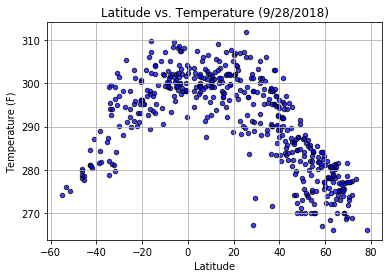

In [9]:
weather_df.plot.scatter(x = "Latitude", y = "Temperature (F)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Temperature (9/28/2018)")
plt.savefig("Images/Latitude vs. Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

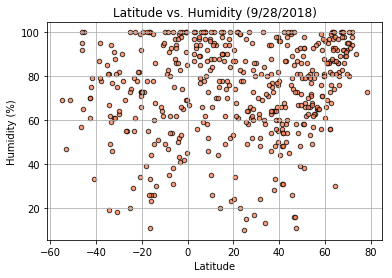

In [10]:
weather_df.plot.scatter(x = "Latitude", y = "Humidity (%)", color = "coral", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Humidity (9/28/2018)")
plt.savefig("Images/Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

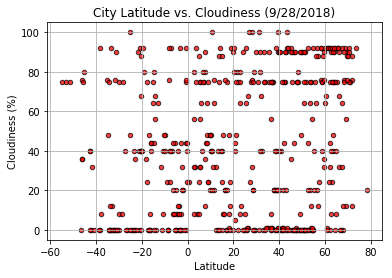

In [11]:
weather_df.plot.scatter(x = "Latitude", y = "Cloudiness (%)", color = "red", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (9/28/2018)")
plt.savefig("Images/Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

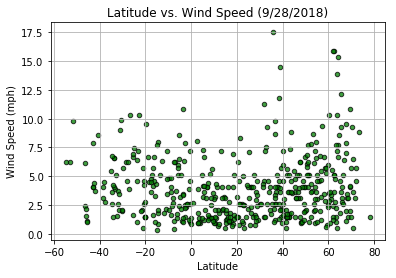

In [12]:
weather_df.plot.scatter(x = "Latitude", y = "Wind Speed (mph)", color = "green", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Wind Speed (9/28/2018)")
plt.savefig("Images/Latitude vs. Wind Speed.png")
plt.show()